In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [2]:
data = pd.read_csv('D:/Download/Weather-Data.csv')

In [3]:
data.head()

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2,1/1/2012 2:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,1/1/2012 3:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,1/1/2012 4:00,-1.5,-3.3,88,7,4.8,101.23,Fog


#number of rows and column

In [4]:
data.shape

(8784, 8)

#Name List of Columns

In [5]:
data.columns

Index(['Date/Time', 'Temp_C', 'Dew Point Temp_C', 'Rel Hum_%',
       'Wind Speed_km/h', 'Visibility_km', 'Press_kPa', 'Weather'],
      dtype='object')

#Data types of each Column

In [6]:
data.dtypes

Date/Time            object
Temp_C              float64
Dew Point Temp_C    float64
Rel Hum_%             int64
Wind Speed_km/h       int64
Visibility_km       float64
Press_kPa           float64
Weather              object
dtype: object

#Information about the data

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date/Time         8784 non-null   object 
 1   Temp_C            8784 non-null   float64
 2   Dew Point Temp_C  8784 non-null   float64
 3   Rel Hum_%         8784 non-null   int64  
 4   Wind Speed_km/h   8784 non-null   int64  
 5   Visibility_km     8784 non-null   float64
 6   Press_kPa         8784 non-null   float64
 7   Weather           8784 non-null   object 
dtypes: float64(4), int64(2), object(2)
memory usage: 549.1+ KB


#Type of Weather

In [8]:
data.Weather.value_counts()

Weather
Mainly Clear                               2106
Mostly Cloudy                              2069
Cloudy                                     1728
Clear                                      1326
Snow                                        390
Rain                                        306
Rain Showers                                188
Fog                                         150
Rain,Fog                                    116
Drizzle,Fog                                  80
Snow Showers                                 60
Drizzle                                      41
Snow,Fog                                     37
Snow,Blowing Snow                            19
Rain,Snow                                    18
Thunderstorms,Rain Showers                   16
Haze                                         16
Drizzle,Snow,Fog                             15
Freezing Rain                                14
Freezing Drizzle,Snow                        11
Freezing Drizzle                

#Unique Weather

In [9]:
data.Weather.nunique()

50

#Converting Weather Categories into Standard Weather Categories

In [10]:
x = 'Thunderstorms, Moderate Rain Showers,Fog'

In [11]:
list_of_lists = [w.split() for w in x.split(',')]
list_of_lists

[['Thunderstorms'], ['Moderate', 'Rain', 'Showers'], ['Fog']]

In [12]:
from itertools import chain
flat_list = list(chain(*list_of_lists))
flat_list

['Thunderstorms', 'Moderate', 'Rain', 'Showers', 'Fog']

In [13]:
def Create_list(x):
    list_of_lists = [w.split() for w in x.split(',')]
    flat_list = list(chain(*list_of_lists))
    return flat_list

def Get_Weather(list1):
    if 'Fog' in list1 and 'Rain' in list1:
        return 'RAIN+FOG'
    elif 'Snow' in list1 and 'Rain' in list1:
        return 'SNOW+RAIN'
    elif 'Snow' in list1:
        return 'SNOW'
    elif 'Rain' in list1:
        return 'RAIN'
    elif 'Fog' in list1:
        return 'FOG'
    elif 'Clear' in list1:
        return 'CLEAR'
    elif 'Cloudy' in list1:
        return 'CLOUDY'
    else:
        return 'RAIN'

In [14]:
Create_list(x)

['Thunderstorms', 'Moderate', 'Rain', 'Showers', 'Fog']

In [15]:
Get_Weather(Create_list(x))

'RAIN+FOG'

#lambda can take any number of args with one expression

In [16]:
data['Std_Weather'] = data['Weather'].apply(lambda x : Get_Weather(Create_list(x)))

In [17]:
data.head()

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather,Std_Weather
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog,FOG
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Fog,FOG
2,1/1/2012 2:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog",FOG
3,1/1/2012 3:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog",FOG
4,1/1/2012 4:00,-1.5,-3.3,88,7,4.8,101.23,Fog,FOG


In [18]:
data.Std_Weather.value_counts()

Std_Weather
CLOUDY       3797
CLEAR        3432
RAIN          603
SNOW          556
FOG           241
RAIN+FOG      129
SNOW+RAIN      26
Name: count, dtype: int64

#Sample Selection and Data Balancing

In [19]:
cloudy_df = data[data['Std_Weather'] == 'CLOUDY']
cloudy_df

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather,Std_Weather
16,1/1/2012 16:00,2.6,-0.2,82,13,12.9,99.93,Mostly Cloudy,CLOUDY
17,1/1/2012 17:00,3.0,0.0,81,13,16.1,99.81,Cloudy,CLOUDY
20,1/1/2012 20:00,3.2,1.3,87,19,25.0,99.50,Cloudy,CLOUDY
21,1/1/2012 21:00,4.0,1.7,85,20,25.0,99.39,Cloudy,CLOUDY
23,1/1/2012 23:00,5.3,2.0,79,30,25.0,99.31,Cloudy,CLOUDY
...,...,...,...,...,...,...,...,...,...
8762,12/31/2012 2:00,-10.1,-13.4,77,9,25.0,101.45,Cloudy,CLOUDY
8763,12/31/2012 3:00,-11.8,-14.4,81,6,25.0,101.42,Mostly Cloudy,CLOUDY
8764,12/31/2012 4:00,-10.5,-12.8,83,11,25.0,101.34,Cloudy,CLOUDY
8765,12/31/2012 5:00,-10.2,-12.4,84,6,25.0,101.28,Cloudy,CLOUDY


In [20]:
cloudy_df = data[data['Std_Weather'] == 'CLOUDY'].sample(600)
cloudy_df

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather,Std_Weather
5412,8/13/2012 12:00,23.8,17.4,67,17,24.1,100.85,Mostly Cloudy,CLOUDY
8764,12/31/2012 4:00,-10.5,-12.8,83,11,25.0,101.34,Cloudy,CLOUDY
4716,7/15/2012 12:00,29.4,19.7,56,9,48.3,101.06,Cloudy,CLOUDY
6448,9/25/2012 16:00,19.2,9.5,53,19,48.3,100.98,Mostly Cloudy,CLOUDY
5115,8/1/2012 3:00,20.8,19.0,89,9,25.0,100.54,Cloudy,CLOUDY
...,...,...,...,...,...,...,...,...,...
3571,5/28/2012 19:00,15.9,6.9,55,22,48.3,100.77,Mostly Cloudy,CLOUDY
6447,9/25/2012 15:00,19.0,10.2,57,28,48.3,100.98,Mostly Cloudy,CLOUDY
4736,7/16/2012 8:00,24.5,20.8,80,7,24.1,100.57,Mostly Cloudy,CLOUDY
6361,9/22/2012 1:00,15.9,15.4,97,7,11.3,100.85,Cloudy,CLOUDY


In [21]:
clear_df = data[data['Std_Weather'] == 'CLEAR'].sample(600)
clear_df

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather,Std_Weather
5704,8/25/2012 16:00,31.1,16.6,42,13,48.3,101.74,Mainly Clear,CLEAR
2079,3/27/2012 15:00,2.1,-16.5,24,15,48.3,101.98,Mainly Clear,CLEAR
7625,11/13/2012 17:00,3.7,-6.1,49,13,25.0,102.41,Clear,CLEAR
2187,4/1/2012 3:00,-1.0,-6.2,68,0,25.0,100.67,Clear,CLEAR
2236,4/3/2012 4:00,-2.1,-11.8,47,13,25.0,100.92,Clear,CLEAR
...,...,...,...,...,...,...,...,...,...
3315,5/18/2012 3:00,8.6,2.0,63,11,25.0,101.77,Clear,CLEAR
2886,4/30/2012 6:00,3.0,-4.3,59,0,48.3,102.33,Mainly Clear,CLEAR
5492,8/16/2012 20:00,23.5,15.3,60,6,25.0,100.52,Mainly Clear,CLEAR
475,1/20/2012 19:00,-16.3,-24.2,51,13,25.0,102.33,Mainly Clear,CLEAR


In [22]:
rain_df = data[data['Std_Weather'] == 'RAIN']
snow_df = data[data['Std_Weather'] == 'SNOW']

In [23]:
rain_df.shape
snow_df.shape

(556, 9)

#Create New Weather Data Set

In [24]:
weather_df = pd.concat([cloudy_df, clear_df, rain_df, snow_df], axis = 0)
weather_df.head()

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather,Std_Weather
5412,8/13/2012 12:00,23.8,17.4,67,17,24.1,100.85,Mostly Cloudy,CLOUDY
8764,12/31/2012 4:00,-10.5,-12.8,83,11,25.0,101.34,Cloudy,CLOUDY
4716,7/15/2012 12:00,29.4,19.7,56,9,48.3,101.06,Cloudy,CLOUDY
6448,9/25/2012 16:00,19.2,9.5,53,19,48.3,100.98,Mostly Cloudy,CLOUDY
5115,8/1/2012 3:00,20.8,19.0,89,9,25.0,100.54,Cloudy,CLOUDY


In [25]:
weather_df.drop(columns = ['Date/Time', 'Weather'], axis = 1, inplace = True)

In [26]:
weather_df[weather_df.duplicated()]

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Std_Weather


In [27]:
weather_df.isnull().sum()

Temp_C              0
Dew Point Temp_C    0
Rel Hum_%           0
Wind Speed_km/h     0
Visibility_km       0
Press_kPa           0
Std_Weather         0
dtype: int64

In [28]:
weather_df.dtypes

Temp_C              float64
Dew Point Temp_C    float64
Rel Hum_%             int64
Wind Speed_km/h       int64
Visibility_km       float64
Press_kPa           float64
Std_Weather          object
dtype: object

In [29]:
weather_df.describe()

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa
count,2359.000000,2359.000000,2359.000000,2359.000000,2359.000000,2359.000000
mean,6.697329,1.571810,72.100466,16.884273,23.249555,100.800941
std,11.471423,10.624003,16.030944,9.459825,12.843235,0.911789
min,-22.800000,-28.000000,20.000000,0.000000,0.600000,97.520000
25%,-2.850000,-6.750000,62.000000,9.000000,16.100000,100.290000
50%,5.500000,0.500000,75.000000,17.000000,24.100000,100.820000
75%,16.700000,10.600000,85.000000,22.000000,25.000000,101.380000
max,32.700000,23.100000,99.000000,70.000000,48.300000,103.630000


#check co-relation

In [30]:
weather_df.columns.tolist()

['Temp_C',
 'Dew Point Temp_C',
 'Rel Hum_%',
 'Wind Speed_km/h',
 'Visibility_km',
 'Press_kPa',
 'Std_Weather']

In [31]:
cols = ['Temp_C',
 'Dew Point Temp_C',
 'Rel Hum_%',
 'Wind Speed_km/h',
 'Visibility_km',
 'Press_kPa']
cor_matrix = weather_df[cols].corr()
cor_matrix

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa
Temp_C,1.000000,0.942536,-0.244221,-0.137952,0.410301,-0.085648
Dew Point Temp_C,0.942536,1.000000,0.087505,-0.133102,0.198678,-0.194753
Rel Hum_%,-0.244221,0.087505,1.000000,0.028268,-0.668157,-0.332401
Wind Speed_km/h,-0.137952,-0.133102,0.028268,1.000000,-0.138378,-0.395385
Visibility_km,0.410301,0.198678,-0.668157,-0.138378,1.000000,0.329141
Press_kPa,-0.085648,-0.194753,-0.332401,-0.395385,0.329141,1.000000


In [32]:
weather_df.isna().sum()

Temp_C              0
Dew Point Temp_C    0
Rel Hum_%           0
Wind Speed_km/h     0
Visibility_km       0
Press_kPa           0
Std_Weather         0
dtype: int64

#Heat Map

<Axes: >

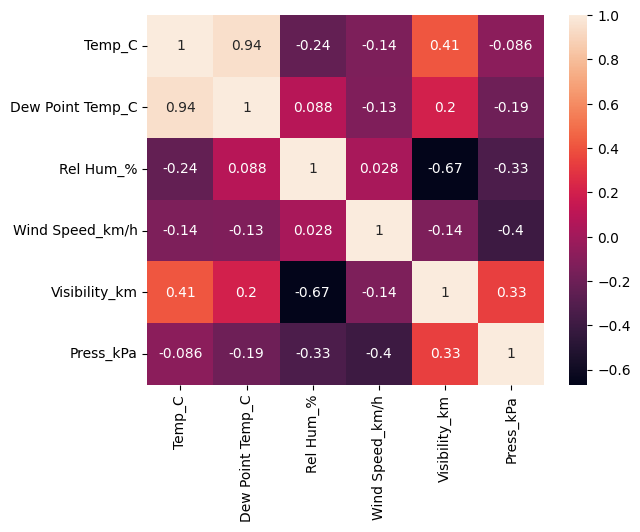

In [33]:
sns.heatmap(cor_matrix, annot = True)

<Axes: ylabel='Frequency'>

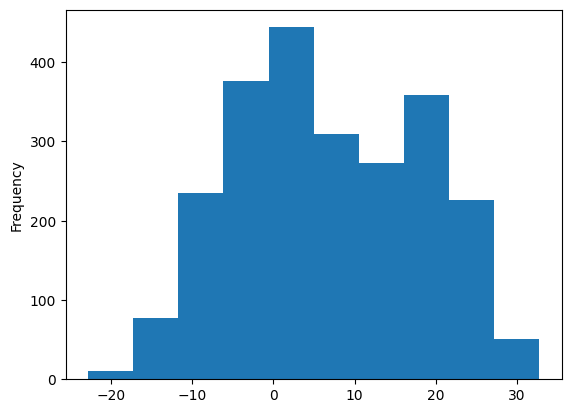

In [34]:
weather_df['Temp_C'].plot(kind = 'hist')

<Axes: >

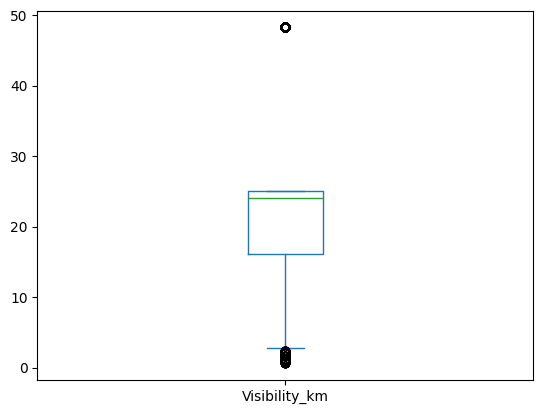

In [35]:
weather_df['Visibility_km'].plot(kind = 'box')

In [36]:
label_Encoder = LabelEncoder()

In [37]:
weather_df['Std_Weather'] = label_Encoder.fit_transform(weather_df['Std_Weather'])

In [38]:
label_Encoder.classes_

array(['CLEAR', 'CLOUDY', 'RAIN', 'SNOW'], dtype=object)

In [39]:
weather_df.head()

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Std_Weather
5412,23.8,17.4,67,17,24.1,100.85,1
8764,-10.5,-12.8,83,11,25.0,101.34,1
4716,29.4,19.7,56,9,48.3,101.06,1
6448,19.2,9.5,53,19,48.3,100.98,1
5115,20.8,19.0,89,9,25.0,100.54,1


In [40]:
weather_df.Std_Weather.value_counts()

Std_Weather
2    603
1    600
0    600
3    556
Name: count, dtype: int64

In [41]:
#Independent Variable
x = weather_df.drop(['Std_Weather'], axis = 1)
x

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa
5412,23.8,17.4,67,17,24.1,100.85
8764,-10.5,-12.8,83,11,25.0,101.34
4716,29.4,19.7,56,9,48.3,101.06
6448,19.2,9.5,53,19,48.3,100.98
5115,20.8,19.0,89,9,25.0,100.54
...,...,...,...,...,...,...
8779,0.1,-2.7,81,30,9.7,100.13
8780,0.2,-2.4,83,24,9.7,100.03
8781,-0.5,-1.5,93,28,4.8,99.95
8782,-0.2,-1.8,89,28,9.7,99.91


In [42]:
#Target Variable:
y = weather_df['Std_Weather']
y

5412    1
8764    1
4716    1
6448    1
5115    1
       ..
8779    3
8780    3
8781    3
8782    3
8783    3
Name: Std_Weather, Length: 2359, dtype: int64

In [43]:
#Scaler for bringing all the columns to the same Scale
from sklearn.preprocessing import StandardScaler

In [44]:
#created object
std_scaler = StandardScaler()

In [45]:
X_std = std_scaler.fit_transform(x)
X_std

array([[ 1.49120968,  1.49016768, -0.31823127,  0.01223612,  0.0662314 ,
         0.05381655],
       [-1.49946313, -1.35305471,  0.68005006, -0.62215953,  0.13632206,
         0.59133567],
       [ 1.97948279,  1.70670449, -1.00454968, -0.83362475,  1.95089138,
         0.28418189],
       ...,
       [-0.62754686, -0.28919997,  1.30397589,  1.17529481, -1.43682387,
        -0.93346347],
       [-0.60138937, -0.31744391,  1.05440556,  1.17529481, -1.05521917,
        -0.97734258],
       [-0.58395104, -0.34568784,  0.86722781,  1.38676003, -0.93061355,
        -0.99928213]], shape=(2359, 6))

In [46]:
#Splitting Data into training and testing
from sklearn.model_selection import train_test_split

In [47]:
#0.2 means 20% data for testing and 80% for training, random_state is 42 which is seed value for random number generator
x_train, x_test, y_train, y_test = train_test_split(X_std, y, test_size = 0.2, random_state = 42)

In [58]:
x_train.shape, x_test.shape

((1887, 6), (472, 6))

In [59]:
#Model Building
from sklearn.tree import DecisionTreeClassifier
decision_tree_model = DecisionTreeClassifier()

In [60]:
#Model Training
decision_tree_model.fit(x_train, y_train)

DecisionTreeClassifier()

In [61]:
#Model Prediction
y_pred_dt = decision_tree_model.predict(x_test)

In [62]:
#Check Model accuracy and performance
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [63]:
accuracy_score(y_test, y_pred_dt)

0.6016949152542372

In [64]:
print(classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

           0       0.56      0.58      0.57       118
           1       0.43      0.42      0.43       128
           2       0.69      0.68      0.69       126
           3       0.75      0.76      0.76       100

    accuracy                           0.60       472
   macro avg       0.61      0.61      0.61       472
weighted avg       0.60      0.60      0.60       472



<Axes: >

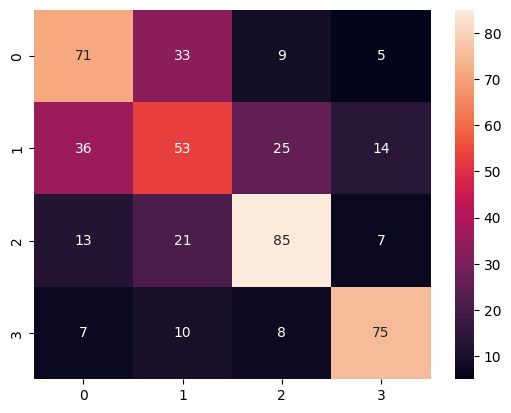

In [55]:
#Confusion Matrix
cm = confusion_matrix(y_test, y_pred_dt)
sns.heatmap(cm, annot = True, fmt = 'd')

In [65]:
#Building Multiple Models (To Check which one is Best)
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

In [68]:
dt_model = DecisionTreeClassifier()
rf_model = RandomForestClassifier()
svc_model = SVC()
knn_model = KNeighborsClassifier()
lr_model = LogisticRegression()
nb_model = GaussianNB()

In [69]:
model_list = [dt_model, rf_model, svc_model, knn_model, lr_model, nb_model]

In [70]:
acc_list = []
#for loop to predict and check the accuracy of all the models
for model in model_list:
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    acc = accuracy_score(y_test, y_pred)
    acc_list.append(acc)

In [71]:
acc_list

[0.6207627118644068,
 0.673728813559322,
 0.6419491525423728,
 0.6546610169491526,
 0.6059322033898306,
 0.5995762711864406]

In [73]:
model_df = pd.DataFrame({'Model': model_list, "Accuracy": acc_list})
model_df

,Model,Accuracy
0,DecisionTreeClassifier(),0.620763
1,"(DecisionTreeClassifier(max_features='sqrt', r...",0.673729
2,SVC(),0.641949
3,KNeighborsClassifier(),0.654661
4,LogisticRegression(),0.605932
5,GaussianNB(),0.599576


**K-fold Cross Validation**

In [75]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(rf_model, X_std, y, cv = 5, scoring='accuracy')
print('Cross-validation scores =', scores)

Cross-validation scores = [0.60169492 0.65042373 0.61228814 0.54025424 0.68789809]


In [76]:
scores.mean()

np.float64(0.6185118212242254)

**Hyperparameter tunning : Model Tunning:**

In [78]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [80]:
parameters = {
    'n_estimators' : [50,100],
    'max_features' : ['sqrt', 'log2', None]
}

In [81]:
grid_search = GridSearchCV(estimator = rf_model, 
                          param_grid = parameters)

In [82]:
grid_search.fit(x_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_features': ['sqrt', 'log2', None],
                         'n_estimators': [50, 100]})